In [1]:
from gurobipy import *
import networkx as nx
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
edges_original = pd.read_csv(r"C:\Users\shn\Downloads\C125.9.clq.txt", sep = " ", header = None)
edges_original

,0,1,2
0,e,2,1
1,e,3,1
2,e,4,1
3,e,4,2
4,e,4,3
...,...,...,...
6958,e,125,120
6959,e,125,121
6960,e,125,122
6961,e,125,123


In [5]:
EdgesWithoutE = edges_original[edges_original.columns[1: 3]]
EdgesWithoutE

,1,2
0,2,1
1,3,1
2,4,1
3,4,2
4,4,3
...,...,...
6958,125,120
6959,125,121
6960,125,122
6961,125,123


In [7]:
EdgesWithoutE.to_csv(r"C:\Users\shn\Downloads\EdgesWithoutE.txt", header=None, index=None, sep=' ', mode='a')

In [9]:
EdgesWithoutEGraph = nx.read_edgelist(r"C:\Users\shn\Downloads\EdgesWithoutE.txt", create_using = nx.Graph(), nodetype = int)
EdgesWithoutEGraph

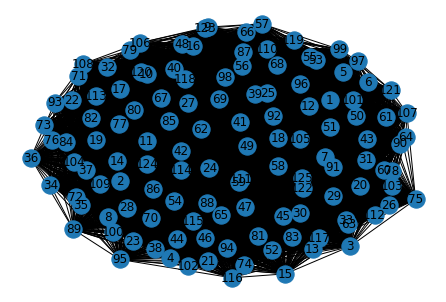

In [10]:
nx.draw(EdgesWithoutEGraph, with_labels = True)
plt.show(EdgesWithoutEGraph)

In [11]:
EdgesWithoutEGraph_complement = nx.complement(EdgesWithoutEGraph)

In [12]:
EdgesWithoutEGraph_complement_EdgesList = list(EdgesWithoutEGraph_complement.edges())
EdgesWithoutEGraph_complement_EdgesList

[(3, 2),
 (3, 16),
 (3, 22),
 (3, 31),
 (3, 34),
 (3, 35),
 (3, 42),
 (3, 56),
 (3, 57),
 (3, 65),
 (3, 80),
 (3, 83),
 (3, 89),
 (3, 94),
 (3, 108),
 (3, 115),
 (3, 117),
 (1, 12),
 (1, 37),
 (1, 42),
 (1, 53),
 (1, 56),
 (1, 67),
 (1, 87),
 (1, 95),
 (1, 106),
 (1, 108),
 (1, 109),
 (1, 118),
 (4, 22),
 (4, 25),
 (4, 31),
 (4, 34),
 (4, 48),
 (4, 68),
 (4, 69),
 (4, 76),
 (4, 77),
 (4, 83),
 (4, 85),
 (4, 93),
 (2, 13),
 (2, 15),
 (2, 20),
 (2, 53),
 (2, 55),
 (2, 56),
 (2, 66),
 (2, 75),
 (2, 90),
 (2, 120),
 (5, 20),
 (5, 22),
 (5, 23),
 (5, 27),
 (5, 28),
 (5, 33),
 (5, 38),
 (5, 74),
 (5, 84),
 (5, 95),
 (5, 97),
 (5, 108),
 (6, 14),
 (6, 15),
 (6, 31),
 (6, 65),
 (6, 70),
 (6, 78),
 (6, 83),
 (6, 104),
 (6, 105),
 (6, 114),
 (6, 125),
 (7, 14),
 (7, 30),
 (7, 58),
 (7, 78),
 (7, 81),
 (7, 86),
 (7, 108),
 (8, 12),
 (8, 40),
 (8, 44),
 (8, 58),
 (8, 110),
 (8, 113),
 (8, 121),
 (9, 12),
 (9, 26),
 (9, 32),
 (9, 46),
 (9, 64),
 (9, 69),
 (9, 74),
 (9, 88),
 (9, 108),
 (9, 116),
 (

In [13]:
EdgesWithoutEGraph_complement_Edges = pd.DataFrame(EdgesWithoutEGraph_complement_EdgesList)
EdgesWithoutEGraph_complement_Edges

,0,1
0,3,2
1,3,16
2,3,22
3,3,31
4,3,34
...,...,...
782,115,119
783,116,118
784,116,123
785,117,118


In [17]:
m = Model("MAX Clique Problem")


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only


In [18]:
x = {}

In [19]:
for i in range(1,126):
        x[i] = m.addVar(lb = 0, ub = 1, vtype = GRB.INTEGER, name = 'x_%s' % (i))

In [20]:
m.update()
m.getVars()

In [22]:
edge_number = len(EdgesWithoutEGraph_complement_Edges.index)
edge_number

787

In [23]:
for i in range(0, edge_number):
    m.addConstr(x[EdgesWithoutEGraph_complement_Edges.loc[i, 0]] + x[EdgesWithoutEGraph_complement_Edges.loc[i, 1]] <= 1)

In [24]:
m.update()

In [25]:
Objective = quicksum(x[i] for i in range(1,126))
m.setObjective(Objective, GRB.MAXIMIZE)

In [26]:
m.optimize()

Optimize a model with 787 rows, 125 columns and 1574 nonzeros
Variable types: 0 continuous, 125 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 26.0000000
Presolve removed 312 rows and 0 columns
Presolve time: 0.02s
Presolved: 475 rows, 125 columns, 1217 nonzeros
Variable types: 0 continuous, 125 integer (125 binary)

Root relaxation: objective 4.322903e+01, 359 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.22903    0  124   26.00000   43.22903  66.3%     -    0s
H    0     0                      29.0000000   43.22903  49.1%     -    0s
H    0     0                      30.0000000   43.21674  44.1%     -    0s
H    0     0                      31.0000000   43.21674  39.4%    

In [27]:
m.objVal

34.0

In [28]:
for v in m.getVars():
    print (v.varName, v.x)

x_1 1.0
x_2 1.0
x_3 -0.0
x_4 -0.0
x_5 1.0
x_6 0.0
x_7 1.0
x_8 0.0
x_9 1.0
x_10 0.0
x_11 1.0
x_12 0.0
x_13 -0.0
x_14 0.0
x_15 0.0
x_16 0.0
x_17 1.0
x_18 1.0
x_19 1.0
x_20 -0.0
x_21 0.0
x_22 0.0
x_23 -0.0
x_24 0.0
x_25 1.0
x_26 -0.0
x_27 0.0
x_28 -0.0
x_29 1.0
x_30 -0.0
x_31 1.0
x_32 -0.0
x_33 -0.0
x_34 1.0
x_35 0.0
x_36 0.0
x_37 -0.0
x_38 0.0
x_39 0.0
x_40 0.0
x_41 0.0
x_42 -0.0
x_43 -0.0
x_44 1.0
x_45 1.0
x_46 -0.0
x_47 0.0
x_48 1.0
x_49 1.0
x_50 0.0
x_51 -0.0
x_52 -0.0
x_53 0.0
x_54 1.0
x_55 -0.0
x_56 -0.0
x_57 -0.0
x_58 0.0
x_59 0.0
x_60 -0.0
x_61 0.0
x_62 0.0
x_63 0.0
x_64 -0.0
x_65 0.0
x_66 -0.0
x_67 -0.0
x_68 -0.0
x_69 -0.0
x_70 1.0
x_71 1.0
x_72 0.0
x_73 0.0
x_74 -0.0
x_75 0.0
x_76 0.0
x_77 1.0
x_78 0.0
x_79 1.0
x_80 1.0
x_81 0.0
x_82 -0.0
x_83 -0.0
x_84 0.0
x_85 1.0
x_86 0.0
x_87 0.0
x_88 -0.0
x_89 0.0
x_90 -0.0
x_91 0.0
x_92 0.0
x_93 0.0
x_94 0.0
x_95 -0.0
x_96 -0.0
x_97 -0.0
x_98 1.0
x_99 1.0
x_100 0.0
x_101 1.0
x_102 -0.0
x_103 0.0
x_104 0.0
x_105 0.0
x_106 -0.0
x_107 0.0
x_1